In [ ]:
import torch
import torchvision
from torchvision import datasets,transforms
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torch import optim

In [ ]:
batch_size=12
train_data=datasets.MNIST('./data',train=True,download=True,transform=transforms.ToTensor())
test_data=datasets.MNIST('./data',train=False,download=True,transform=transforms.ToTensor())
train_loader=torch.utils.data.DataLoader(train_data,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_data,batch_size=batch_size)

In [ ]:
class MLP_h(nn.Module):
    def __init__(self,hidden_units=[512,256,128]):
        super().__init__()
        #이미지의 픽셀들을 받아와 모델의 input으로 넣어줍니다.
        self.in_dim=28*28
        #10개의 카테고리로 나누기 위한 output layer를 생성합니다.
        self.out_dim=10
        #modulelist 설계
        self.l_layers=nn.ModuleList()
        self.l_layers.append(nn.Linear(self.in_dim,hidden_units[0]))
        for i in range(len(hidden_units)-1):
            self.l_layers.append(nn.Linear(hidden_units[i],hidden_units[i+1]))
        self.l_layers.append(nn.Linear(hidden_units[-1],self.out_dim))
        #본 예제에서는 결과 값이 0에 수렴하는 Vanishing Gradient 문제를 피하기 위해서 sigmoid 함수를 사용하지 않고 ReLU 함수를 활성화함수로 사용합니다.
        self.relu=nn.ReLU()
        self.log_softmax=nn.LogSoftmax()
# 순전파 함수는 입력데이터의 텐서를 받고 출력데이터의 텐서를 return해야 합니다. 
# 텐서연산자와 생성자에서 정의한 모듈을 이용할 수 있습니다.        
    def forward(self,x):
        a=x.view(-1,self.in_dim)
        for i in range(len(self.l_layers)):
            z=self.l_layers[i](a)
            if i==len(self.l_layers)-1:
                logit=z
            else:
                a=self.relu(z)
        return logit

In [ ]:
model=MLP_h([512]) #1번째 layer 
criterion=nn.CrossEntropyLoss()
#optimizer는 확률적 경사 하강법(Stochastic Gradient Descent)을 사용한다.
#이 방법은 전체 데이터의 loss를 구하는 것이 아닌 일부데이터를 가져와 loss를 계산하는 것으로 일부데이터로 연산을 진행하는 만큼 더 빠른 학습을 진행할 수 있습니다
optimizer=optim.SGD(model.parameters(),lr=0.01)

In [ ]:

for epoch in range(10):
    running_loss=0.0
    for i, data in enumerate(train_loader,0):
        inputs, labels = data     
        optimizer.zero_grad() #gradients 초기화  
        outputs=model(inputs) #data를 모델에 전달하면서 forward 연산을 진행합니다.
        loss=criterion(outputs, labels) #loss 계산 
        loss.backward()
        optimizer.step() #파라마터 업데이트
        running_loss+=loss.item()
        if(i+1)%2000==0:
            print('[%d, %d] loss: %.3f' %
                 (epoch+1,i+1,running_loss/2000))
            running_loss=0.0
print('Finished Training')

[1, 2000] loss: 0.830
[1, 4000] loss: 0.367
[2, 2000] loss: 0.290
[2, 4000] loss: 0.277
[3, 2000] loss: 0.240
[3, 4000] loss: 0.212
[4, 2000] loss: 0.192
[4, 4000] loss: 0.182
[5, 2000] loss: 0.163
[5, 4000] loss: 0.153
[6, 2000] loss: 0.141
[6, 4000] loss: 0.138
[7, 2000] loss: 0.121
[7, 4000] loss: 0.125
[8, 2000] loss: 0.111
[8, 4000] loss: 0.109
[9, 2000] loss: 0.099
[9, 4000] loss: 0.100
[10, 2000] loss: 0.091
[10, 4000] loss: 0.090
Finished Training


In [ ]:
layer1=[]
n_predict=0
n_correct=0
for data in test_loader:
    inputs, labels=data
    outputs=model(inputs)
    _, predicted=torch.max(outputs,1)
    
    n_predict+=len(predicted)
    n_correct+=(labels==predicted).sum()
    layer1.append(n_correct/n_predict)
print(f"{n_correct}/{n_predict}")
print(f"Accuracy: {n_correct/n_predict:.3f}")

9758/10000
Accuracy: 0.976


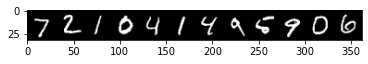

GroundTruth
    7   2   1   0   4   1   4   9   5   9   0   6
prediction
    7   2   1   0   4   1   4   9   5   9   0   6


In [ ]:
def imshow(img):
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
dataiter=iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, nrow=batch_size))
print('GroundTruth')
print("  "+' '.join('%3s' % label.item() for label in labels))

outputs=model(images)
_, predicted=torch.max(outputs,1)
print('prediction')
print("  "+' '.join('%3s' % label.item() for label in predicted))

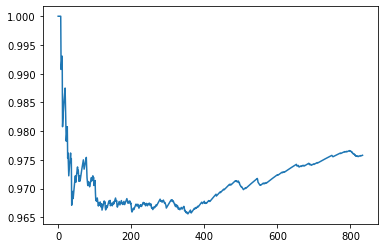

In [ ]:
plt.plot(layer1)

In [ ]:
model=MLP_h([512,256])
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01)
for epoch in range(10):
    running_loss=0.0
    for i, data in enumerate(train_loader,0):
        inputs, labels = data     
        optimizer.zero_grad()     
        outputs=model(inputs)
        loss=criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        if(i+1)%2000==0:
            print('[%d, %d] loss: %.3f' %
                 (epoch+1,i+1,running_loss/2000))
            running_loss=0.0
print('Finished Training')
layer2=[]
n_predict=0
n_correct=0
for data in test_loader:
    inputs, labels=data
    outputs=model(inputs)
    _, predicted=torch.max(outputs,1)
    
    n_predict+=len(predicted)
    n_correct+=(labels==predicted).sum()
    layer2.append(n_correct/n_predict)
print(f"{n_correct}/{n_predict}")
print(f"Accuracy: {n_correct/n_predict:.3f}")

[1, 2000] loss: 1.047
[1, 4000] loss: 0.365
[2, 2000] loss: 0.275
[2, 4000] loss: 0.228
[3, 2000] loss: 0.191
[3, 4000] loss: 0.170
[4, 2000] loss: 0.140
[4, 4000] loss: 0.136
[5, 2000] loss: 0.112
[5, 4000] loss: 0.111
[6, 2000] loss: 0.089
[6, 4000] loss: 0.091
[7, 2000] loss: 0.078
[7, 4000] loss: 0.074
[8, 2000] loss: 0.066
[8, 4000] loss: 0.065
[9, 2000] loss: 0.057
[9, 4000] loss: 0.056
[10, 2000] loss: 0.047
[10, 4000] loss: 0.050
Finished Training
9758/10000
Accuracy: 0.976


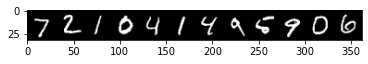

GroundTruth
    7   2   1   0   4   1   4   9   5   9   0   6
prediction
    7   2   1   0   4   1   4   9   5   9   0   6


In [ ]:
def imshow(img):
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
dataiter=iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, nrow=batch_size))
print('GroundTruth')
print("  "+' '.join('%3s' % label.item() for label in labels))

outputs=model(images)
_, predicted=torch.max(outputs,1)
print('prediction')
print("  "+' '.join('%3s' % label.item() for label in predicted))

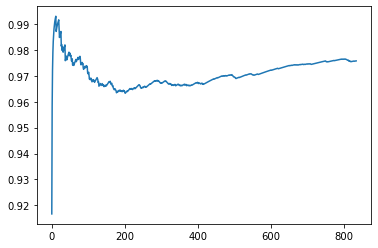

In [ ]:
plt.plot(layer2)

In [ ]:
model=MLP_h([512,256,128])
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01)
for epoch in range(10):
    running_loss=0.0
    for i, data in enumerate(train_loader,0):
        inputs, labels = data     
        optimizer.zero_grad()     
        outputs=model(inputs)
        loss=criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        if(i+1)%2000==0:
            print('[%d, %d] loss: %.3f' %
                 (epoch+1,i+1,running_loss/2000))
            running_loss=0.0
print('Finished Training')
layer3=[]
n_predict=0
n_correct=0
for data in test_loader:
    inputs, labels=data
    outputs=model(inputs)
    _, predicted=torch.max(outputs,1)
    
    n_predict+=len(predicted)
    n_correct+=(labels==predicted).sum()
    layer3.append(n_correct/n_predict)
print(f"{n_correct}/{n_predict}")
print(f"Accuracy: {n_correct/n_predict:.3f}")

[1, 2000] loss: 1.494
[1, 4000] loss: 0.412
[2, 2000] loss: 0.281
[2, 4000] loss: 0.228
[3, 2000] loss: 0.169
[3, 4000] loss: 0.153
[4, 2000] loss: 0.119
[4, 4000] loss: 0.115
[5, 2000] loss: 0.090
[5, 4000] loss: 0.088
[6, 2000] loss: 0.074
[6, 4000] loss: 0.070
[7, 2000] loss: 0.057
[7, 4000] loss: 0.061
[8, 2000] loss: 0.046
[8, 4000] loss: 0.053
[9, 2000] loss: 0.037
[9, 4000] loss: 0.042
[10, 2000] loss: 0.030
[10, 4000] loss: 0.032
Finished Training
9780/10000
Accuracy: 0.978


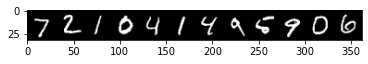

GroundTruth
    7   2   1   0   4   1   4   9   5   9   0   6
prediction
    7   2   1   0   4   1   4   9   5   9   0   6


In [ ]:
def imshow(img):
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
dataiter=iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, nrow=batch_size))
print('GroundTruth')
print("  "+' '.join('%3s' % label.item() for label in labels))

outputs=model(images)
_, predicted=torch.max(outputs,1)
print('prediction')
print("  "+' '.join('%3s' % label.item() for label in predicted))

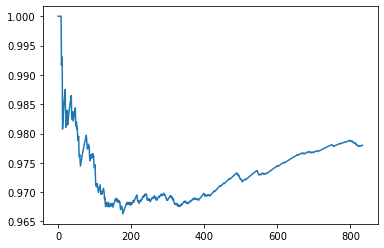

In [ ]:
plt.plot(layer3)

In [ ]:
model=MLP_h([512,256,128,64])
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01)
for epoch in range(10):
    running_loss=0.0
    for i, data in enumerate(train_loader,0):
        inputs, labels = data     
        optimizer.zero_grad()     
        outputs=model(inputs)
        loss=criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        if(i+1)%2000==0:
            print('[%d, %d] loss: %.3f' %
                 (epoch+1,i+1,running_loss/2000))
            running_loss=0.0
print('Finished Training')
layer4=[]
n_predict=0
n_correct=0
for data in test_loader:
    inputs, labels=data
    outputs=model(inputs)
    _, predicted=torch.max(outputs,1)
    
    n_predict+=len(predicted)
    n_correct+=(labels==predicted).sum()
    layer4.append(n_correct/n_predict)
print(f"{n_correct}/{n_predict}")
print(f"Accuracy: {n_correct/n_predict:.3f}")

[1, 2000] loss: 2.216
[1, 4000] loss: 0.710
[2, 2000] loss: 0.308
[2, 4000] loss: 0.228
[3, 2000] loss: 0.155
[3, 4000] loss: 0.138
[4, 2000] loss: 0.106
[4, 4000] loss: 0.103
[5, 2000] loss: 0.079
[5, 4000] loss: 0.074
[6, 2000] loss: 0.059
[6, 4000] loss: 0.064
[7, 2000] loss: 0.048
[7, 4000] loss: 0.048
[8, 2000] loss: 0.035
[8, 4000] loss: 0.042
[9, 2000] loss: 0.026
[9, 4000] loss: 0.033
[10, 2000] loss: 0.020
[10, 4000] loss: 0.029
Finished Training
9771/10000
Accuracy: 0.977


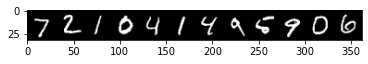

GroundTruth
    7   2   1   0   4   1   4   9   5   9   0   6
prediction
    7   2   1   0   4   1   4   9   5   9   0   6


In [ ]:
def imshow(img):
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
dataiter=iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, nrow=batch_size))
print('GroundTruth')
print("  "+' '.join('%3s' % label.item() for label in labels))

outputs=model(images)
_, predicted=torch.max(outputs,1)
print('prediction')
print("  "+' '.join('%3s' % label.item() for label in predicted))

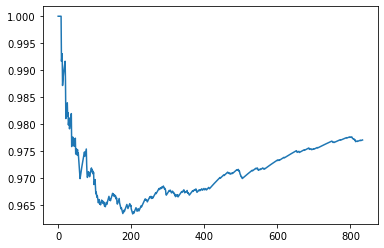

In [ ]:
plt.plot(layer4)

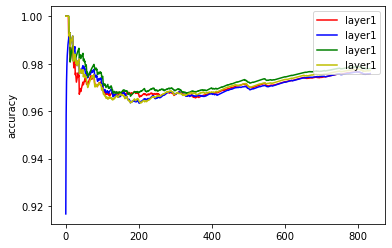

In [ ]:
plt.plot(layer1,'r-',label='layer1')
plt.plot(layer2,'b-',label='layer1')
plt.plot(layer3,'g-',label='layer1')
plt.plot(layer4,'y-',label='layer1')
plt.ylabel('accuracy')
plt.legend(loc='upper right')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (10,) and (834,)

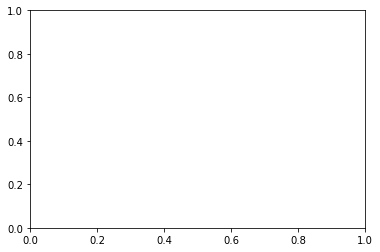

In [ ]:
plt.plot(epoch,layer1,'r-',label='layer1')
plt.plot(epoch,layer2,'b-',label='layer2')
plt.plot(epoch,layer3,'g-',label='layer3')
plt.plot(epoch,layer4,label='layer3')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='upper right')
plt.show()